In [1]:
# Import Dependencies
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib notebook

In [2]:
# Import "Disaster Declarations" pivot table
disaster_declare = '../orig_piv_chart.csv'
DD_df = pd.read_csv(disaster_declare, low_memory=False)
DD_df

,Chemical,Coastal Storm,Dam/Levee Break,Drought,Earthquake,Fire,Fishing Losses,Flood,Freezing,Human Cause,...,Other,Severe Ice Storm,Severe Storm(s),Snow,Terrorist,Tornado,Toxic Substances,Tsunami,Typhoon,Volcano
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,6.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,0.0,0.0,...,2.0,0.0,3.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,10.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63,0.0,1.0,0.0,0.0,0.0,52.0,0.0,400.0,0.0,0.0,...,0.0,21.0,393.0,74.0,0.0,1.0,1.0,0.0,0.0,0.0
64,0.0,0.0,3.0,0.0,0.0,90.0,0.0,220.0,0.0,0.0,...,0.0,20.0,257.0,55.0,0.0,45.0,0.0,0.0,0.0,0.0
65,0.0,3.0,0.0,0.0,0.0,105.0,0.0,185.0,0.0,0.0,...,0.0,0.0,121.0,39.0,0.0,2.0,0.0,0.0,7.0,1.0
66,0.0,42.0,0.0,0.0,8.0,24.0,0.0,648.0,0.0,0.0,...,0.0,0.0,554.0,0.0,0.0,13.0,0.0,0.0,9.0,0.0


In [3]:
DD_df.columns

Index(['Chemical', 'Coastal Storm', 'Dam/Levee Break', 'Drought', 'Earthquake',
       'Fire', 'Fishing Losses', 'Flood', 'Freezing', 'Human Cause',
       'Hurricane', 'Mud/Landslide', 'Other', 'Severe Ice Storm',
       'Severe Storm(s)', 'Snow', 'Terrorist', 'Tornado', 'Toxic Substances',
       'Tsunami', 'Typhoon', 'Volcano'],
      dtype='object')

In [26]:
# Rank the disasters in order of descending counties affected
ranks_df = DD_df.nunique().sort_values(ascending = False)
# set the dataframe
ranks_df =ranks_df.reset_index()
# ranks_df = ranks_df.groupby(['fyDeclared']).count().reset_index()

In [27]:
# rename the columns
ranks_df = ranks_df.rename(columns = {"index": "Disasters", 0:"Total"})
# check the dataframe
ranks_df

,Disasters,Total
0,Flood,60
1,Severe Storm(s),44
2,Hurricane,41
3,Fire,37
4,Tornado,35
5,Snow,28
6,Severe Ice Storm,20
7,Freezing,14
8,Typhoon,13
9,Earthquake,12


In [18]:
# Summing all the disasters
# https://www.fema.gov/disasters/year?field_dv2_declaration_type_value=DR
# Total number of Major disasters online was 376, very close to what we have as the numbers get updated every 24hrs
disaster_sum = ranks_df['Total'].sum()
disaster_sum

363

In [19]:
# Creating a new column calculating percentage of disasters from year 2013-2020
ranks_df['Percentage_of_disasters'] = ((ranks_df['Total'])/(disaster_sum))
ranks_df['Percentage_of_disasters']=ranks_df['Percentage_of_disasters'].map("{:,.2%}".format)
ranks_df

,Disasters,Total,Percentage_of_disasters
0,Flood,60,16.53%
1,Severe Storm(s),44,12.12%
2,Hurricane,41,11.29%
3,Fire,37,10.19%
4,Tornado,35,9.64%
5,Snow,28,7.71%
6,Severe Ice Storm,20,5.51%
7,Freezing,14,3.86%
8,Typhoon,13,3.58%
9,Earthquake,12,3.31%


<IPython.core.display.Javascript object>


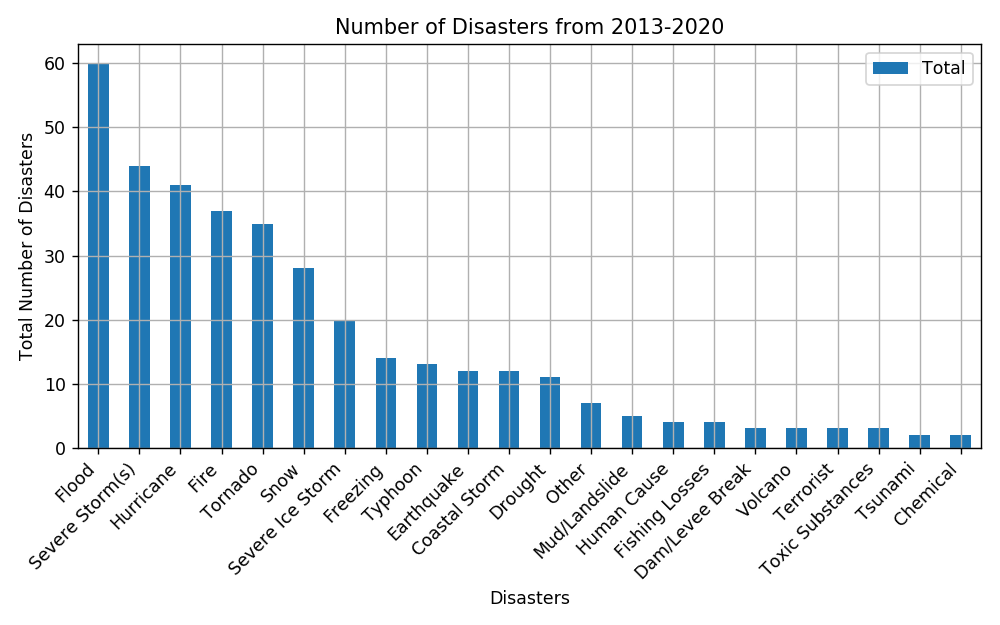

In [23]:
# plotting the disasters in a bar chart
ax = ranks_df.plot(kind="bar", figsize=(8,5))
ax.set_xticklabels(ranks_df["Disasters"], rotation=45, ha = "right")
ax.set_xlabel("Disasters")
ax.set_ylabel("Total Number of Disasters")
ax.set_title("Number of Disasters from 2013-2020")
# for p in ax.patches:
#     width, height = p.get_width(), p.get_height()
#     x, y = p.get_xy() 
#     ax.annotate('{:.0%}'.format(height), (x, y + height + 0.01))
plt.grid()
plt.show()
plt.tight_layout()
plt.savefig('Number of Disasters from 2013-2020.png')

In [ ]:
# Create arch-categories [human-based, heat-based, cold-based, precipitation based, geology-based] and create a pie chart a)overall and b) by decade

In [ ]:
# outside = ['heat-based','cold-based','precipitation-based', 'geology-based', 'human-based']


In [22]:
# ranks_df['heat_based'] = ranks_df.groupby(DD_df['Fire']).nunique() + (DD_df['Volcano']).nunique()
# heat_based

,Chemical,Coastal Storm,Dam/Levee Break,Drought,Earthquake,Fire,Fishing Losses,Flood,Freezing,Human Cause,...,Other,Severe Ice Storm,Severe Storm(s),Snow,Terrorist,Tornado,Toxic Substances,Tsunami,Typhoon,Volcano
Fire,,,,,,,,,,,,,,,,,,,,,
0.0,4,5,5,6,6,4,5,14,4,4,...,6,5,7,6,4,9,5,4,7,5
1.0,4,5,4,4,5,4,4,9,5,4,...,6,4,7,4,4,9,4,4,5,4
2.0,4,6,4,4,5,4,5,8,5,5,...,4,5,8,6,4,8,5,4,6,5
3.0,4,4,4,5,5,4,4,5,5,4,...,5,4,5,4,4,5,4,4,5,4
4.0,4,5,4,4,5,4,4,5,5,5,...,4,4,5,5,4,5,4,4,4,4
6.0,4,4,4,4,4,4,4,4,4,4,...,4,4,4,4,4,4,4,4,4,4
7.0,4,5,4,5,5,4,4,6,4,5,...,5,5,6,5,4,6,5,4,6,4
8.0,4,4,4,6,6,4,4,8,5,4,...,4,6,8,5,4,8,5,4,7,5
9.0,4,4,4,4,4,4,4,4,4,4,...,4,4,4,4,4,4,4,4,4,4
